In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('AMZN.csv', parse_dates=True, index_col='Date')

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-07,164.576996,166.287506,164.153000,165.121506,165.121506,48182000
2021-10-08,165.850006,166.071503,164.410004,164.431000,164.431000,39964000
2021-10-11,163.750000,164.629501,161.904999,162.315002,162.315002,40684000
2021-10-12,162.850006,163.376495,161.813995,162.366501,162.366501,36392000
2021-10-13,163.485504,164.419006,163.054504,164.214005,164.214005,48402000


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-03,113.580002,116.910004,112.449997,115.879997,115.879997,50941900
2022-10-04,119.889999,123.000000,119.790001,121.089996,121.089996,62812600
2022-10-05,118.580002,121.750000,117.690002,120.949997,120.949997,48217500
2022-10-06,120.769997,121.529999,119.500000,120.300003,120.300003,42253800
2022-10-07,118.000000,118.169998,113.879997,114.559998,114.559998,54626400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-10-07 to 2022-10-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.shape

(253, 6)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,143.708557,145.929678,141.374471,143.580678,143.580678,7.164079e+07
std,23.355645,23.192017,23.399794,23.242307,23.242307,3.154392e+07
min,102.750000,104.580002,101.260002,102.309998,102.309998,3.575400e+07
25%,122.255997,123.760002,119.790001,122.190002,122.190002,5.270400e+07
50%,144.800003,147.850006,142.000000,144.779999,144.779999,6.281260e+07
75%,165.122498,166.494995,163.666000,164.992996,164.992996,8.054800e+07
max,185.634506,188.107498,183.785995,184.802994,184.802994,2.726620e+08


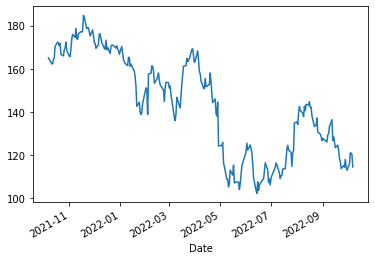

In [ ]:
df.Close.plot()

In [ ]:
amz = df['Close']

In [ ]:
amz.reset_index(drop=True, inplace=True)

In [ ]:
amz.shape

(253,)

In [ ]:
amz = pd.DataFrame(amz)

In [ ]:
amz.head()

,Close
0,165.121506
1,164.431000
2,162.315002
3,162.366501
4,164.214005


In [ ]:
 train = amz.iloc[:240]
 test = amz.iloc[240:]

In [ ]:
train.shape, test.shape

((240, 1), (13, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)


In [ ]:
scaled_train

array([[0.76141625],
       [0.75304577],
       [0.72739514],
       [0.72801942],
       [0.75041531],
       [0.75985842],
       [0.82602171],
       [0.84888429],
       [0.84731443],
       [0.82968266],
       [0.84177457],
       [0.78149056],
       [0.77228976],
       [0.80605024],
       [0.81600259],
       [0.84878125],
       [0.8038441 ],
       [0.77092004],
       [0.76767122],
       [0.81085671],
       [0.86722524],
       [0.89267572],
       [0.87448645],
       [0.92736958],
       [0.87028595],
       [0.86449766],
       [0.89640954],
       [0.9088529 ],
       [0.90583455],
       [0.9108652 ],
       [1.        ],
       [0.98818702],
       [0.92515122],
       [0.92967894],
       [0.92990313],
       [0.88392958],
       [0.91848413],
       [0.88545095],
       [0.84705382],
       [0.84319883],
       [0.81436616],
       [0.83714382],
       [0.89528215],
       [0.89520336],
       [0.87111646],
       [0.84736901],
       [0.81531173],
       [0.809

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 |      length: Length of the outp

In [ ]:
length = 13
batch_size = 32

generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length = length, batch_size=batch_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout

In [ ]:
n_features = 1

In [ ]:
model = Sequential()

model.add(SimpleRNN(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(generator,epochs=10,shuffle=False)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


8/8 [==============================] - 4s 12ms/step - loss: 0.3989
Epoch 2/10
8/8 [==============================] - 0s 12ms/step - loss: 0.1370
Epoch 3/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0693
Epoch 4/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0503
Epoch 5/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0513
Epoch 6/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0469
Epoch 7/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0362
Epoch 8/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0333
Epoch 9/10
8/8 [==============================] - 0s 12ms/step - loss: 0.0257
Epoch 10/10
8/8 [==============================] - 0s 12ms/step - loss: 0.0280


In [ ]:
losses = pd.DataFrame(model.history.history)

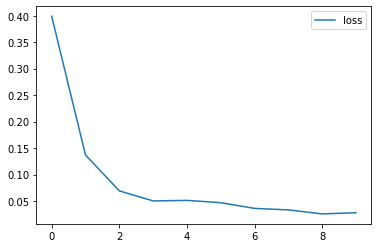

In [ ]:
losses.plot()

In [ ]:
first_eval_batch = scaled_train[-length:]

In [ ]:
first_eval_batch

array([[0.3092384 ],
       [0.30548053],
       [0.28850938],
       [0.32936127],
       [0.33348297],
       [0.37530466],
       [0.4138533 ],
       [0.29711616],
       [0.31808767],
       [0.29057014],
       [0.25723397],
       [0.27093216],
       [0.2409902 ]])

In [ ]:
first_eval_batch = first_eval_batch.reshape((1,length,1))

In [ ]:
first_eval_batch

array([[[0.3092384 ],
        [0.30548053],
        [0.28850938],
        [0.32936127],
        [0.33348297],
        [0.37530466],
        [0.4138533 ],
        [0.29711616],
        [0.31808767],
        [0.29057014],
        [0.25723397],
        [0.27093216],
        [0.2409902 ]]])

In [ ]:
model.predict(first_eval_batch)

array([[0.286445]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.19674401])

In [ ]:
test_pred = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_pred.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_pred

[array([0.286445], dtype=float32),
 array([0.27729142], dtype=float32),
 array([0.20884717], dtype=float32),
 array([0.25862607], dtype=float32),
 array([0.2510341], dtype=float32),
 array([0.19426772], dtype=float32),
 array([0.24454036], dtype=float32),
 array([0.20488584], dtype=float32),
 array([0.23024824], dtype=float32),
 array([0.1879628], dtype=float32),
 array([0.17686167], dtype=float32),
 array([0.20205024], dtype=float32),
 array([0.18860519], dtype=float32)]

In [ ]:
true_pred = scaler.inverse_transform(test_pred)

In [ ]:
true_pred

array([[125.93970357],
       [125.18459776],
       [119.53842636],
       [123.64483765],
       [123.0185539 ],
       [118.33572425],
       [122.48286523],
       [119.21164481],
       [121.30386536],
       [117.81561253],
       [116.89984733],
       [118.97772755],
       [117.86860513]])

In [ ]:
test['prediction'] = true_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test

,Close,prediction
240,118.540001,125.939704
241,117.309998,125.184598
242,113.779999,119.538426
243,115.150002,123.644838
244,114.410004,123.018554
245,118.010002,118.335724
246,114.800003,122.482865
247,113.000000,119.211645
248,115.879997,121.303865
249,121.089996,117.815613


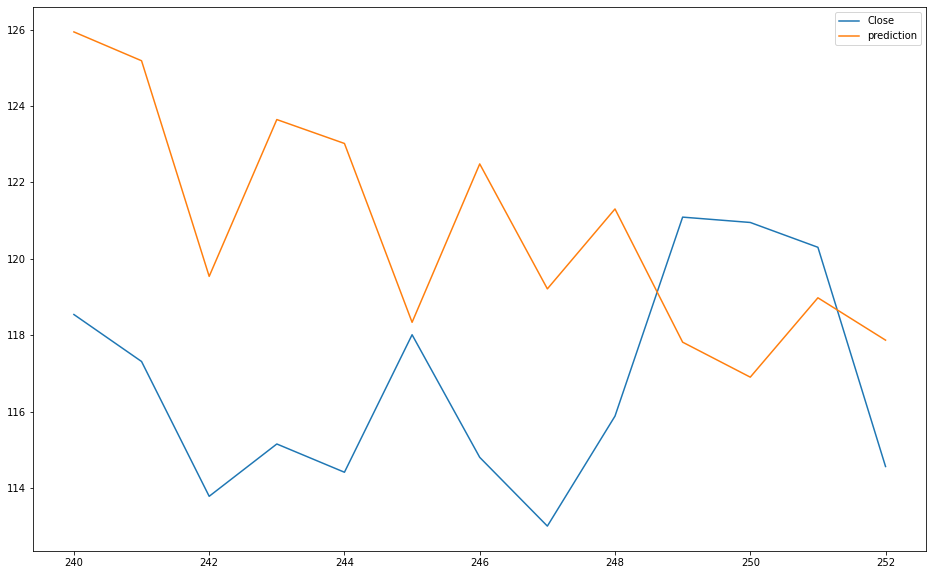

In [ ]:
test.plot(figsize=(16,10))


In [ ]:
full_scaler = MinMaxScaler()

sc = full_scaler.fit_transform(amz)

In [ ]:
generator = TimeseriesGenerator(sc,sc,
                                length=length,batch_size=32)

In [ ]:
model = Sequential()

model.add(SimpleRNN(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit_generator(generator,epochs=10,shuffle=False)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


8/8 [==============================] - 1s 13ms/step - loss: 0.9153
Epoch 2/10
8/8 [==============================] - 0s 10ms/step - loss: 0.3356
Epoch 3/10
8/8 [==============================] - 0s 11ms/step - loss: 0.1601
Epoch 4/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0788
Epoch 5/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0679
Epoch 6/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0665
Epoch 7/10
8/8 [==============================] - 0s 12ms/step - loss: 0.0641
Epoch 8/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0611
Epoch 9/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0440
Epoch 10/10
8/8 [==============================] - 0s 12ms/step - loss: 0.0449


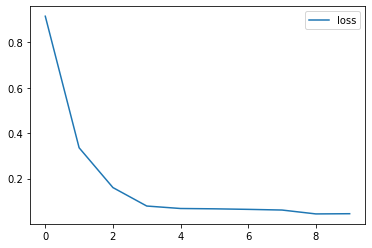

In [ ]:
full_model_loss = pd.DataFrame(model.history.history)
full_model_loss.plot()

In [ ]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(20):
  current_pred = model.predict(current_batch)[0]

  forecast.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
forecast

array([[136.64758633],
       [113.6683437 ],
       [131.07617985],
       [117.65588736],
       [132.97034993],
       [118.59394731],
       [134.24805543],
       [126.06597616],
       [128.67316528],
       [119.00012924],
       [134.80545004],
       [117.14506871],
       [141.12132447],
       [111.32375498],
       [147.19726819],
       [103.24736988],
       [146.09848369],
       [104.39608678],
       [148.4341555 ],
       [106.73526654]])

In [ ]:
forecast.flatten()

array([136.64758633, 113.6683437 , 131.07617985, 117.65588736,
       132.97034993, 118.59394731, 134.24805543, 126.06597616,
       128.67316528, 119.00012924, 134.80545004, 117.14506871,
       141.12132447, 111.32375498, 147.19726819, 103.24736988,
       146.09848369, 104.39608678, 148.4341555 , 106.73526654])

In [ ]:
df_array = np.array(amz)
df_array

array([[165.121506],
       [164.431   ],
       [162.315002],
       [162.366501],
       [164.214005],
       [164.992996],
       [170.451004],
       [172.337006],
       [172.207504],
       [170.753006],
       [171.750504],
       [166.777496],
       [166.018494],
       [168.803497],
       [169.624496],
       [172.328506],
       [168.621506],
       [165.905502],
       [165.637497],
       [169.199997],
       [173.850006],
       [175.949493],
       [174.449005],
       [178.811493],
       [174.102493],
       [173.625   ],
       [176.257507],
       [177.283997],
       [177.035004],
       [177.449997],
       [184.802994],
       [183.828506],
       [178.628494],
       [179.001999],
       [179.020493],
       [175.227997],
       [178.078506],
       [175.3535  ],
       [172.186005],
       [171.867996],
       [169.489502],
       [171.3685  ],
       [176.164505],
       [176.158005],
       [174.171005],
       [172.212006],
       [169.567505],
       [169.0

In [ ]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(),forecast.flatten())))

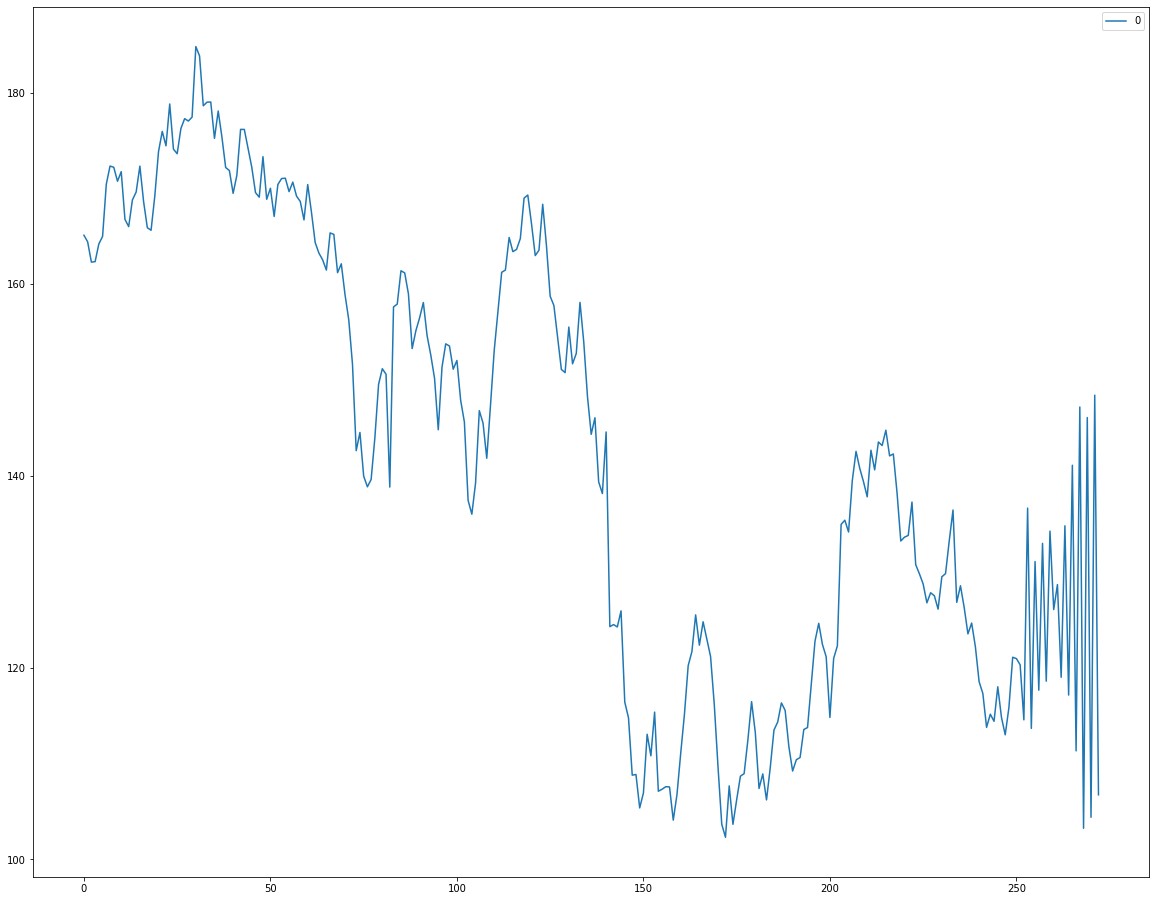

In [ ]:

full_data.plot(figsize=(20,16))


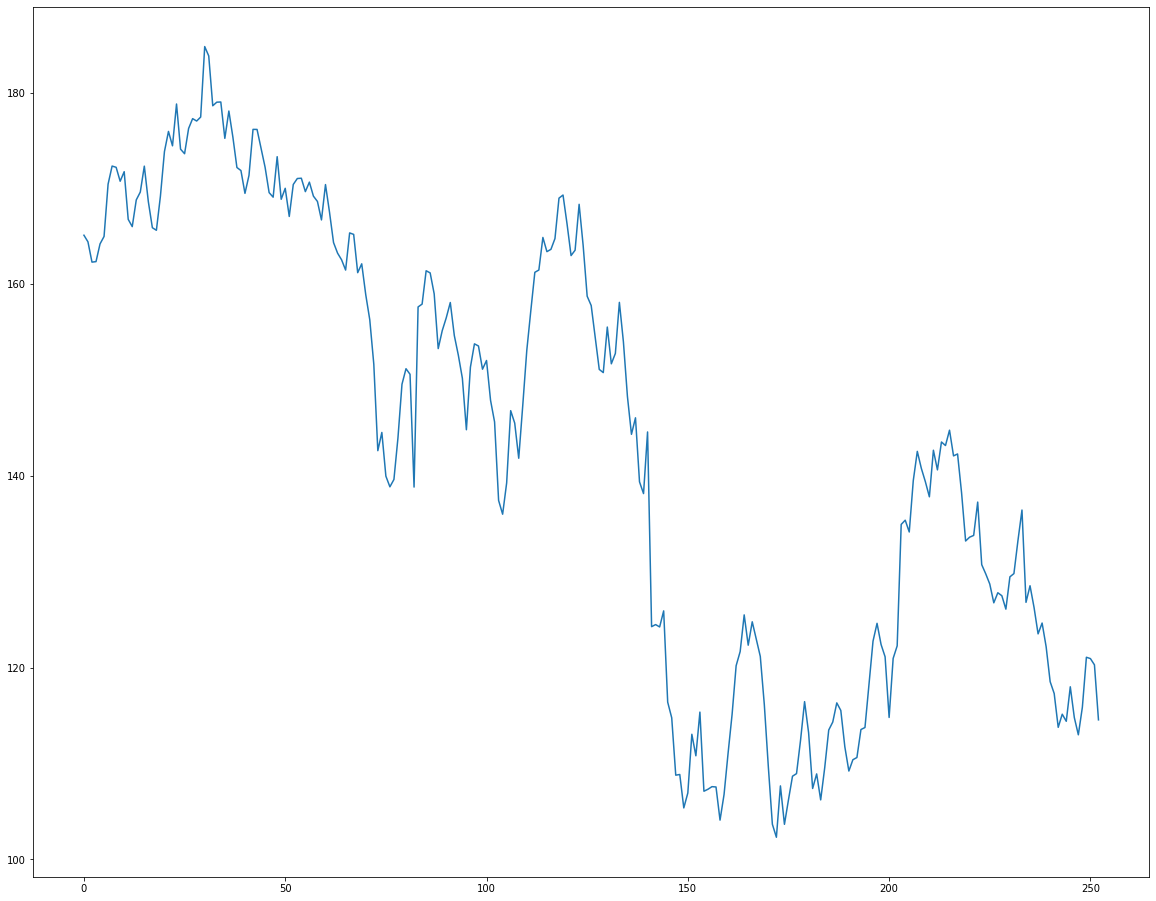

In [ ]:
df.Close.plot(figsize=(20,16))


LSTM MODEL


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
scaled_test.shape

(13, 1)

In [ ]:
length = 12

generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=length, batch_size=32)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                           length=length, batch_size=32)

In [ ]:
model = Sequential()

model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit_generator(generator,epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop],shuffle=False)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


8/8 [==============================] - 2s 60ms/step - loss: 0.3238 - val_loss: 0.0017
Epoch 2/30
8/8 [==============================] - 0s 10ms/step - loss: 0.1128 - val_loss: 0.0071
Epoch 3/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0314 - val_loss: 0.0294


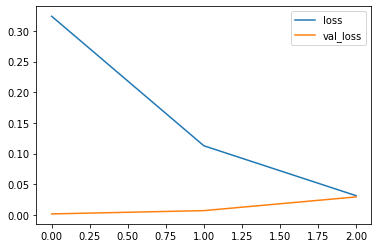

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
test_pred = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_pred.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


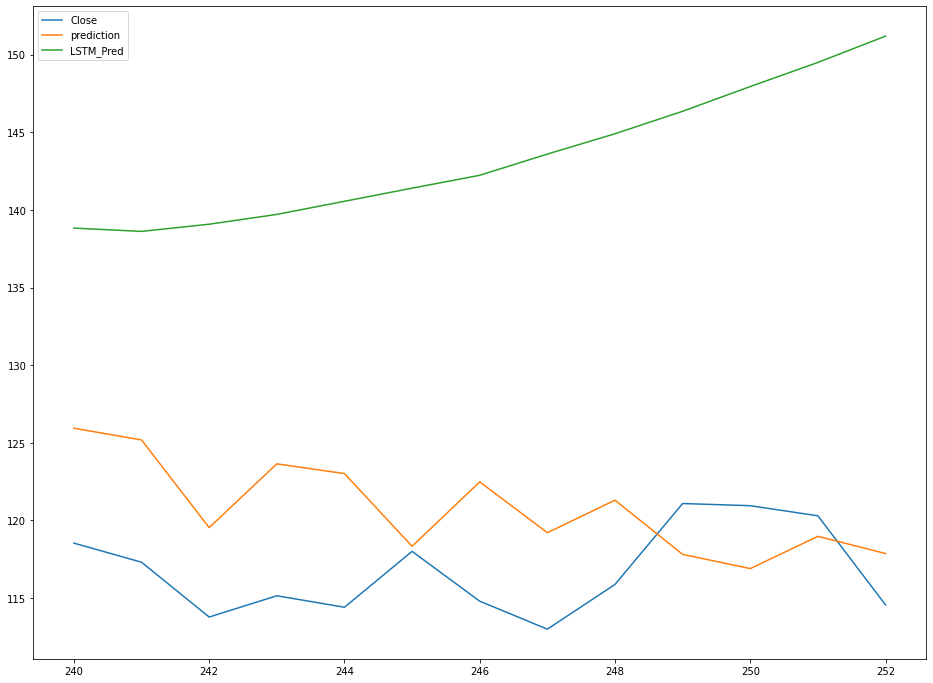

In [ ]:
true_pred = scaler.inverse_transform(test_pred)
test['LSTM_Pred'] = true_pred
test.plot(figsize=(16,12))

FB Prophet


In [ ]:
df.reset_index(inplace=True)

In [ ]:
data = df[['Date','Close']]

In [ ]:
data.head()

,Date,Close
0,2021-10-07,165.121506
1,2021-10-08,164.431000
2,2021-10-11,162.315002
3,2021-10-12,162.366501
4,2021-10-13,164.214005


In [ ]:
data = data.rename(columns= {'Date':'ds','Close':'y'})

In [ ]:
data.head()

,ds,y
0,2021-10-07,165.121506
1,2021-10-08,164.431000
2,2021-10-11,162.315002
3,2021-10-12,162.366501
4,2021-10-13,164.214005


In [ ]:
from prophet import Prophet

In [ ]:
m = Prophet(changepoint_prior_scale=0.15,daily_seasonality=True)
m.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuy5d0b3i/kanbs4lp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuy5d0b3i/xi117yk1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26001', 'data', 'file=/tmp/tmpuy5d0b3i/kanbs4lp.json', 'init=/tmp/tmpuy5d0b3i/xi117yk1.json', 'output', 'file=/tmp/tmpuy5d0b3i/prophet_modelageteksa/prophet_model-20221008090135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:01:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:01:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


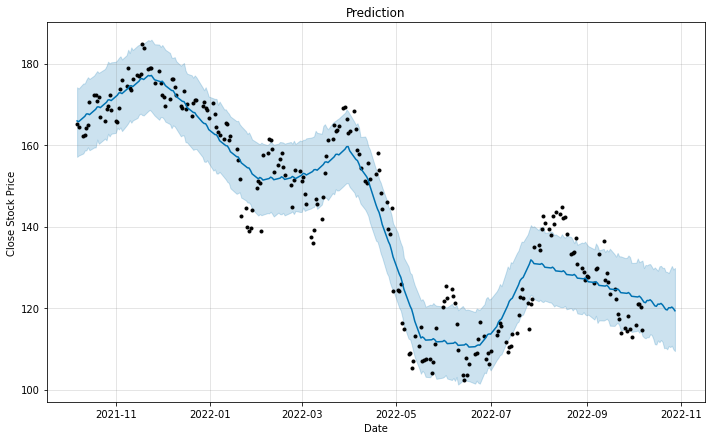

In [ ]:
future = m.make_future_dataframe(periods=21)
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction")
plt.xlabel('Date')
plt.ylabel('Close Stock Price')
plt.show()

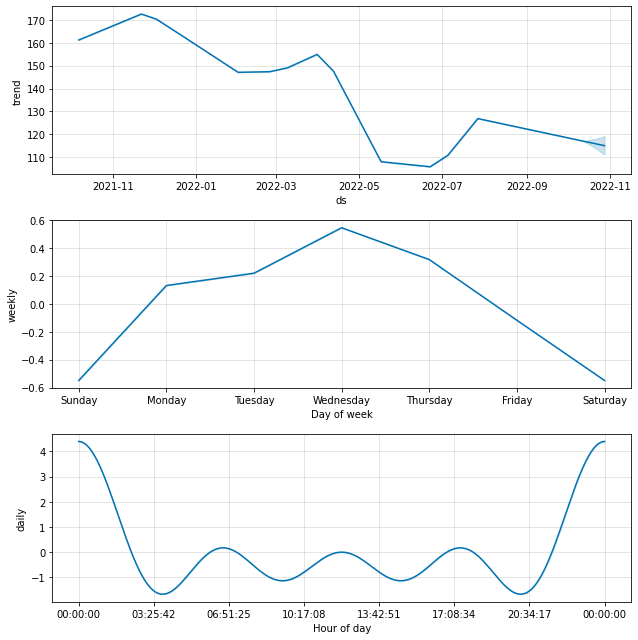

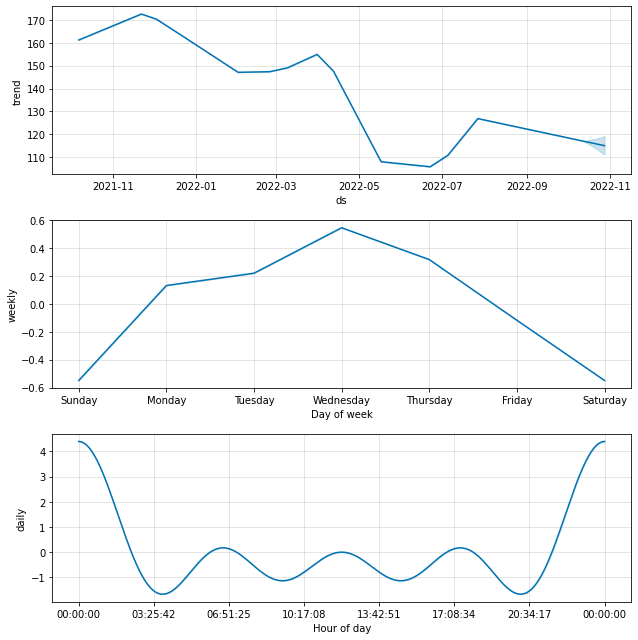

In [ ]:
m.plot_components(prediction)